In [ ]:
import numpy as np
import matplotlib.pyplot as plt

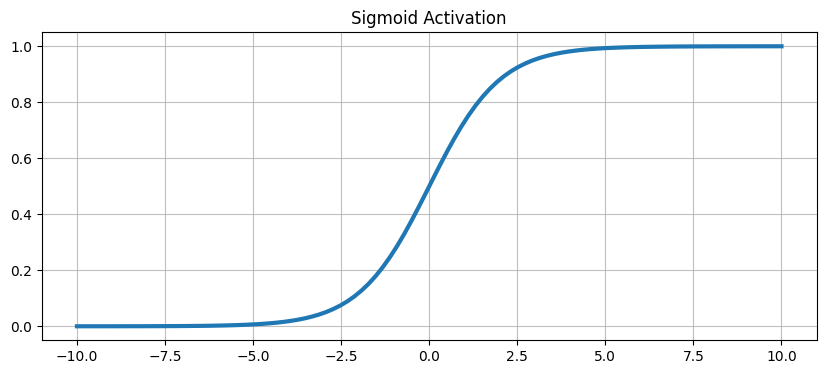

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10,10,100)
plt.figure(figsize=(10,4))
plt.plot(x, sigmoid(x), linewidth=3)
plt.title("Sigmoid Activation")
plt.grid(True, alpha=0.8)

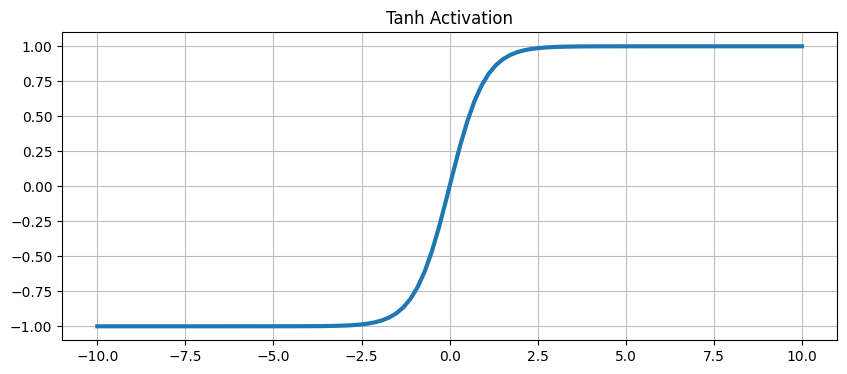

In [ ]:
def tanh(x):
  return np.tanh(x)

x = np.linspace(-10,10,100)
plt.figure(figsize=(10,4))
plt.plot(x, tanh(x), linewidth=3)
plt.title("Tanh Activation")
plt.grid(True, alpha=0.8)

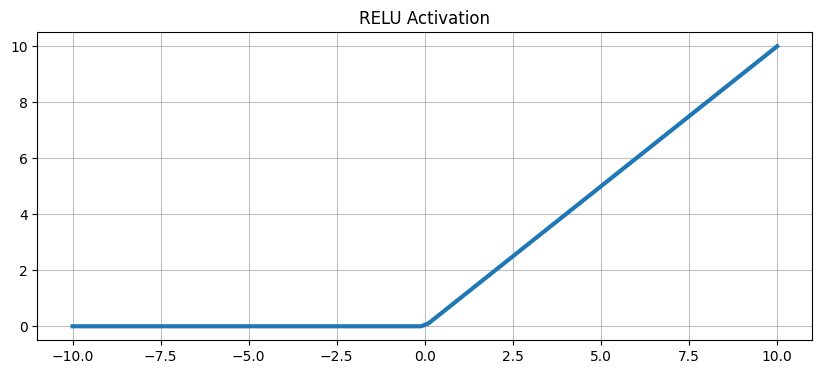

In [ ]:
#recitified linear unit
def relu(x):
  return np.maximum(0, x)

x = np.linspace(-10,10,100)
plt.figure(figsize=(10,4))
plt.plot(x, relu(x), linewidth=3)
plt.title("RELU Activation")
plt.grid(True, alpha=0.8)

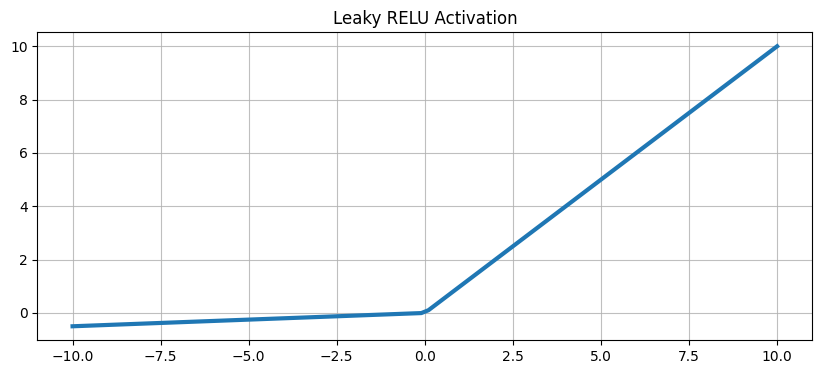

In [ ]:
#recitified linear unit
def leaky_relu(x, alpha=0.05):
  return np.where(x>0, x, alpha*x)

x = np.linspace(-10,10,100)
plt.figure(figsize=(10,4))
plt.plot(x, leaky_relu(x), linewidth=3)
plt.title("Leaky RELU Activation")
plt.grid(True, alpha=0.8)

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

sigmoid(13.12)

np.float64(0.9999979952716741)

In [ ]:
#Neural network using numpy

In [ ]:
import numpy as np

In [ ]:
X = np.array([7, 2, 25])
actual = 85

#weights and biases - randomly? - yes
W1, W2 = 0.1, 0.16
W3, W4 = 0.1, 0.5
W5, W6 = 0.1, 0.6
W7, W8 = 7, 3
b1, b2, b3 = -4, -4, 12

In [ ]:
# learn to take breaks
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
def forward_propogation(X):
  Z1 = (W1 * X[0]) + (W3 * X[1]) + (W5 * X[2]) + b1
  Z2 = (W2 * X[0]) + (W4 * X[1]) + (W6 * X[2]) + b2
  G1 = sigmoid(Z1)
  G2 = sigmoid(Z2)
  y_pred = (W7 * G1) + (W8 * G2) + b3
  return Z1, Z2, G1, G2, y_pred

In [ ]:
Z1, Z2, G1, G2, y_pred = forward_propogation(X)
print(f"Z1 : {Z1}")
print(f"Z2 : {Z2}")
print(f"G1 : {G1}")
print(f"G2 : {G2}")
print(f"Y_pred = {y_pred}")
print("\nError..Error..Error")
print(f"Cost : {actual - y_pred}")

Z1 : -0.5999999999999996
Z2 : 13.120000000000001
G1 : 0.35434369377420466
G2 : 0.9999979952716741
Y_pred = 17.480399842234455

Error..Error..Error
Cost : 67.51960015776555


In [ ]:
#Backpropogation
def sigmoid_derivative(x):
  return x * (1-x)

In [ ]:
def backward_propogation(X, actual, Z1, Z2, G1, G2, y_pred):
  dC_dy_pred = 2 * (y_pred - actual)

  dC_dW7 = dC_dy_pred * G1
  dC_dW8 = dC_dy_pred * G2
  dC_db3 = dC_dy_pred

  #confuse you - defi
  dC_dG1 = dC_dy_pred * W7
  dC_dG2 = dC_dy_pred * W8

  dC_Z1 = dC_dG1 * sigmoid_derivative(G1)
  dC_Z2 = dC_dG2 * sigmoid_derivative(G2)

  dC_dW1 = dC_Z1 * X[0]
  dC_dW2 = dC_Z2 * X[0]
  dC_dW3 = dC_Z1 * X[1]
  dC_dW4 = dC_Z2 * X[1]
  dC_dW5 = dC_Z1 * X[2]
  dC_dW6 = dC_Z2 * X[2]
  dC_db1 = dC_Z1
  dC_db2 = dC_Z2

  return dC_dW1, dC_dW2, dC_dW3, dC_dW4, dC_dW5, dC_dW6, dC_dW7, dC_dW8, dC_db1, dC_db2, dC_db3


In [ ]:
gradients = backward_propogation(X, actual, Z1, Z2, G1, G2, y_pred)

In [ ]:
print(f"dC/dW1  = {gradients[0]}")
print(f"dC/dW2  = {gradients[1]}")
print(f"dC/dW3  = {gradients[2]}")
print(f"dC/dW4  = {gradients[3]}")
print(f"dC/dW5  = {gradients[4]}")
print(f"dC/dW6  = {gradients[5]}")
print(f"dC/dW7  = {gradients[6]}")
print(f"dC/dW8  = {gradients[7]}")
print(f"dC/db1  = {gradients[8]}")
print(f"dC/db2  = {gradients[9]}")
print(f"dC/db3  = {gradients[10]}")

dC/dW1  = -1513.847202927096
dC/dW2  = -0.005685043712575546
dC/dW3  = -432.5277722648846
dC/dW4  = -0.0016242982035930133
dC/dW5  = -5406.597153311058
dC/dW6  = -0.020303727544912664
dC/dW7  = -47.85028904412003
dC/dW8  = -135.03892959862114
dC/db1  = -216.2638861324423
dC/db2  = -0.0008121491017965066
dC/db3  = -135.0392003155311


In [ ]:
#update weights

In [ ]:
W1 = W1 - 0.001 * gradients[0]
W2 = W2 - 0.001 * gradients[1]
W3 = W3 - 0.001 * gradients[2]
W4 = W4 - 0.001 * gradients[3]
W5 = W5 - 0.001 * gradients[4]
W6 = W6 - 0.001 * gradients[5]
W7 = W7 - 0.001 * gradients[6]
W8 = W8 - 0.001 * gradients[7]
b1 = b1 - 0.001 * gradients[8]
b2 = b2 - 0.001 * gradients[9]
b3 = b3 - 0.001 * gradients[10]

In [ ]:
print(f"Updated W1 = {W1}")
print(f"Updated W2 = {W2}")
print(f"Updated W3 = {W3}")
print(f"Updated W4 = {W4}")
print(f"Updated W5 = {W5}")
print(f"Updated W6 = {W6}")
print(f"Updated W7 = {W7}")
print(f"Updated W8 = {W8}")
print(f"Updated b1 = {b1}")
print(f"Updated b2 = {b2}")
print(f"Updated b3 = {b3}")

Updated W1 = 15.23847202927096
Updated W2 = 0.16005685043712575
Updated W3 = 4.425277722648846
Updated W4 = 0.500016242982036
Updated W5 = 54.16597153311058
Updated W6 = 0.6002030372754491
Updated W7 = 7.4785028904412005
Updated W8 = 4.350389295986211
Updated b1 = -1.8373611386755768
Updated b2 = -3.999991878508982
Updated b3 = 13.350392003155312


In [ ]:
W1 = W1 - 0.001 * gradients[0]
W2 = W2 - 0.001 * gradients[1]
W3 = W3 - 0.001 * gradients[2]
W4 = W4 - 0.001 * gradients[3]
W5 = W5 - 0.001 * gradients[4]
W6 = W6 - 0.001 * gradients[5]
W7 = W7 - 0.001 * gradients[6]
W8 = W8 - 0.001 * gradients[7]
b1 = b1 - 0.001 * gradients[8]
b2 = b2 - 0.001 * gradients[9]
b3 = b3 - 0.001 * gradients[10]

In [ ]:
print(f"Updated W1 = {W1}")
print(f"Updated W2 = {W2}")
print(f"Updated W3 = {W3}")
print(f"Updated W4 = {W4}")
print(f"Updated W5 = {W5}")
print(f"Updated W6 = {W6}")
print(f"Updated W7 = {W7}")
print(f"Updated W8 = {W8}")
print(f"Updated b1 = {b1}")
print(f"Updated b2 = {b2}")
print(f"Updated b3 = {b3}")

Updated W1 = 16.752319232198058
Updated W2 = 0.16006253548083832
Updated W3 = 4.85780549491373
Updated W4 = 0.5000178672802396
Updated W5 = 59.57256868642163
Updated W6 = 0.600223341002994
Updated W7 = 7.52635317948532
Updated W8 = 4.485428225584832
Updated b1 = -1.6210972525431344
Updated b2 = -3.9999910663598803
Updated b3 = 13.485431203470842


In [ ]:
#actual -> write all this?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow import keras

In [ ]:
np.random.seed(10)
num_samples = 300
X = np.random.rand(num_samples,3) * np.array([24, 10, 60])
y = np.random.rand(num_samples) * 100

In [ ]:
pd.DataFrame(X, columns=['hours_of_sleep','cups_of_coffee',"travel_time"]).head(4) #fake

,hours_of_sleep,cups_of_coffee,travel_time
0,18.511695,0.207519,38.018894
1,17.971293,4.985070,13.487799
2,4.753509,7.605307,10.146650
3,2.120156,6.853598,57.203601


In [ ]:
#neural network

In [ ]:
def create_custom_model():
  #input
  inputs = keras.Input(shape=(3,))
  #hidden
  x = layers.Dense(2, activation='sigmoid')(inputs)
  #output
  outputs = layers.Dense(1, activation='linear')(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss = "mean_squared_error",
              metrics=['accuracy'])
  return model

In [ ]:
model = create_custom_model()

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X, y, epochs=130,
                    batch_size=32, validation_split=0.20)

Epoch 1/130
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.0000e+00 - loss: 3369.9885 - val_accuracy: 0.0000e+00 - val_loss: 3400.1809
Epoch 2/130
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 3265.0227 - val_accuracy: 0.0000e+00 - val_loss: 3334.5649
Epoch 3/130
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 3127.6824 - val_accuracy: 0.0000e+00 - val_loss: 3289.0071
Epoch 4/130
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 3130.7395 - val_accuracy: 0.0000e+00 - val_loss: 3259.3625
Epoch 5/130
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 3062.7466 - val_accuracy: 0.0000e+00 - val_loss: 3237.8176
Epoch 6/130
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 3210.4102 - val_accuracy: 0.0000e+00 - val_loss: 3220.0195
Epoch 7/130
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 2910.1838 - val_accuracy: 0.0000e+00 - val_loss: 3203.4683
Epoch 8/130
8/8 ━━━━

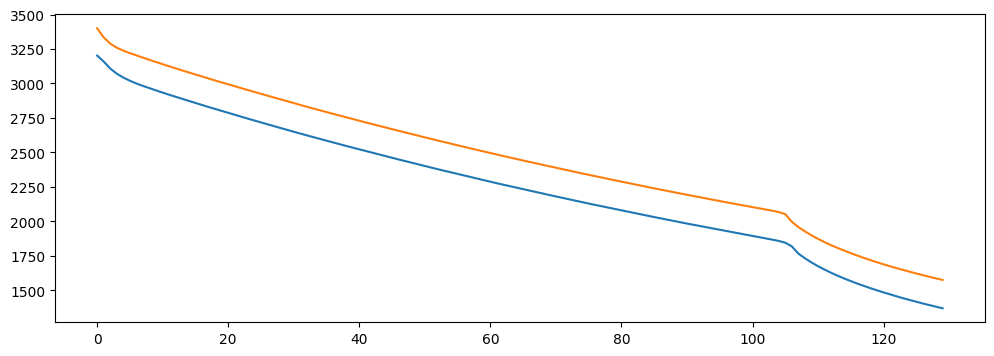

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
import keras_tuner as kt
import pickle
import os

In [ ]:
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

In [ ]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['gender'] = df['gender'].map({'Female': 0, "Male": 1})
df['Churn'] = df['Churn'].map({"No": 0, "Yes": 1})

print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
df.dropna(inplace=True)
print("\nMissing values after cleaning:")
print(df.isnull().sum()) #isna.sum()


Missing values after cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1889.50,0
2,3668-QPYBK,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,1840.75,0
4,9237-HQITU,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,151.65,1


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Selected features by RFE: ['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

Feature importances:
             feature  importance
18      TotalCharges    0.191946
17    MonthlyCharges    0.178952
4             tenure    0.152571
14          Contract    0.078829
16     PaymentMethod    0.055766
8     OnlineSecurity    0.045120
11       TechSupport    0.043974
0             gender    0.028073
15  PaperlessBilling    0.025130
7    InternetService    0.024460
9       OnlineBackup    0.023808
10  DeviceProtection    0.023422
2            Partner    0.023004
6      MultipleLines    0.022363
1      SeniorCitizen    0.021023
13   StreamingMovies    0.019961
3         Dependents    0.019291
12       StreamingTV    0.017975
5       PhoneService    0.004330


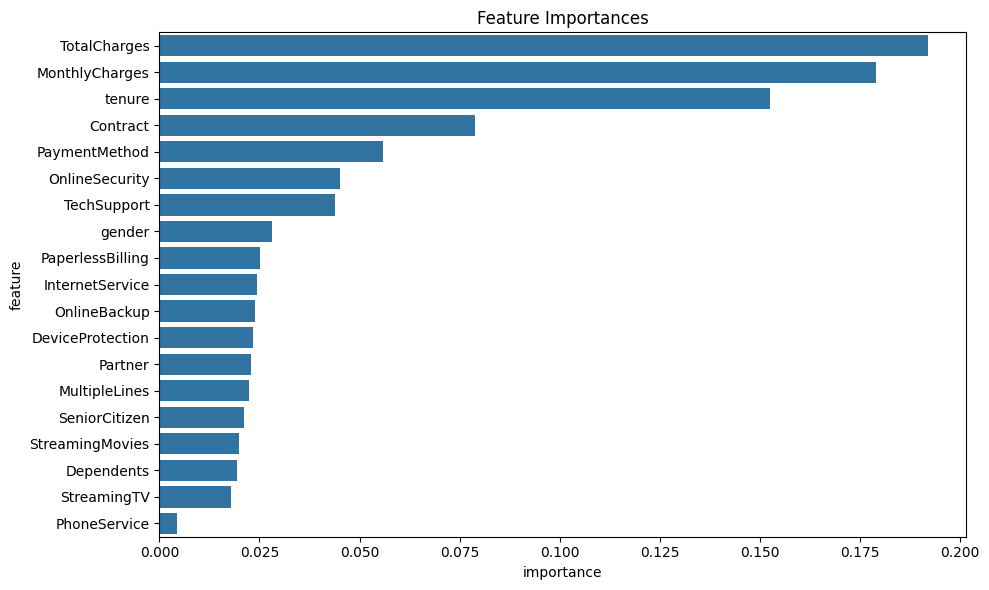

In [ ]:
#FEATURE SELECTION USING RFE

numerical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

for col in numerical_features:
    if df[col].dtype == 'object':
        df[col] = pd.factorize(df[col])[0]

numerical_features = [f for f in numerical_features if f in df.columns]

X = df[numerical_features]
y = df['Churn']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X, y)

selected_features = [feature for feature, selected in
                     zip(numerical_features, rfe.support_) if selected]
print(f"Selected features by RFE: {selected_features}")

rf.fit(X, y)
importances = pd.DataFrame({'feature': numerical_features,
                            'importance': rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)
print("\nFeature importances:")
print(importances)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
selected_features #same

['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

In [ ]:
X = df[selected_features]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
def create_model(hp=None):
    if hp:
        model = models.Sequential()
        model.add(layers.Dense(
            units=hp.Choice('units_1', values=[32, 64, 128]),
            activation='relu',
            input_shape=(X_train_scaled.shape[1],)
        ))
        if hp.Boolean('second_layer'):
            model.add(layers.Dense(
                units=hp.Choice('units_2', values=[16, 32]),
                activation='relu'
            ))
        model.add(layers.Dense(1, activation='sigmoid'))
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    else:
      #5 ---> hl1(64) ----> hl2(32) ----> hl3(16) ----> hl4(8) ----->1
        model = models.Sequential([
            layers.Dense(64, activation='relu',
                         input_shape=(X_train_scaled.shape[1],)),
            layers.Dense(32, activation='relu'),
            layers.Dense(16, activation='relu'),
            layers.Dense(8, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer="adam", loss='binary_crossentropy',
                      metrics=['accuracy'])

    return model

initial_model = create_model()
initial_model.summary()

history = initial_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.20,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7469 - loss: 0.5625 - val_accuracy: 0.7884 - val_loss: 0.4392
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7769 - loss: 0.4573 - val_accuracy: 0.7938 - val_loss: 0.4328
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7824 - loss: 0.4444 - val_accuracy: 0.7893 - val_loss: 0.4271
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7806 - loss: 0.4405 - val_accuracy: 0.7964 - val_loss: 0.4253
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7826 - loss: 0.4402 - val_accuracy: 0.7893 - val_loss: 0.4277
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7844 - loss: 0.4299 - val_accuracy: 0.7973 - val_loss: 0.4243
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7975 - loss: 0.4223 - val_accuracy: 0.7929 - val_loss: 0.4219
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7926 - loss: 0.4347 - val_accuracy: 0.

In [ ]:
loss, accuracy = initial_model.evaluate(X_test_scaled, y_test)
print(f"Initial Model - Test Loss: {loss}")
print(f"Initial Model - Test Accuracy: {accuracy}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.3985
Initial Model - Test Loss: 0.40349847078323364
Initial Model - Test Accuracy: 0.815209686756134


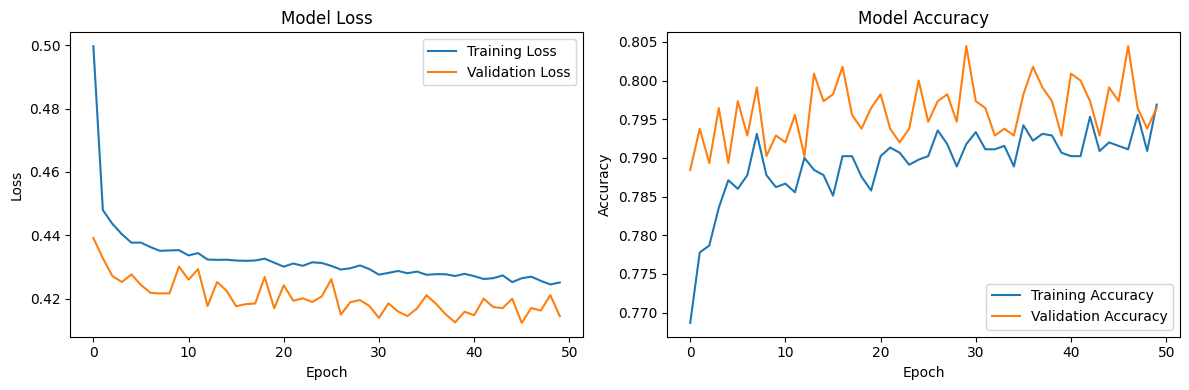

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.tight_layout()

In [ ]:
tuner = kt.RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=5,
    directory = 'keras_tuning'
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3)

tuner.search(X_train_scaled, y_train,
             epochs=50,
             validation_split=0.20,
             callbacks=[early_stopping])

Reloading Tuner from keras_tuning/untitled_project/tuner0.json


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
for param in best_hps.values:
  print(f"{param} : {best_hps.get(param)}")

units_1 : 128
second_layer : True
units_2 : 16


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=3)
for i, hp in enumerate(best_hps):
  print(f"Rank {i+1}: {hp.values}")

Rank 1: {'units_1': 128, 'second_layer': True, 'units_2': 16}
Rank 2: {'units_1': 32, 'second_layer': False, 'units_2': 32}
Rank 3: {'units_1': 128, 'second_layer': False, 'units_2': 16}


In [ ]:
#use them directly to train my model
best_model = tuner.hypermodel.build(best_hps)
best_history = best_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    validation_split=0.20,
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6739 - loss: 0.5770 - val_accuracy: 0.7778 - val_loss: 0.4362
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7611 - loss: 0.4611 - val_accuracy: 0.7876 - val_loss: 0.4301
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7775 - loss: 0.4537 - val_accuracy: 0.7876 - val_loss: 0.4283
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7833 - loss: 0.4399 - val_accuracy: 0.7876 - val_loss: 0.4266
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7799 - loss: 0.4467 - val_accuracy: 0.7831 - val_loss: 0.4248
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7801 - loss: 0.4435 - val_accuracy: 0.7991 - val_loss: 0.4255
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7828 - loss: 0.4430 - val_accuracy: 0.7876 - val_loss: 0.4202
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7928 - loss: 0.4392 - val_accuracy: 0.7947 - val_

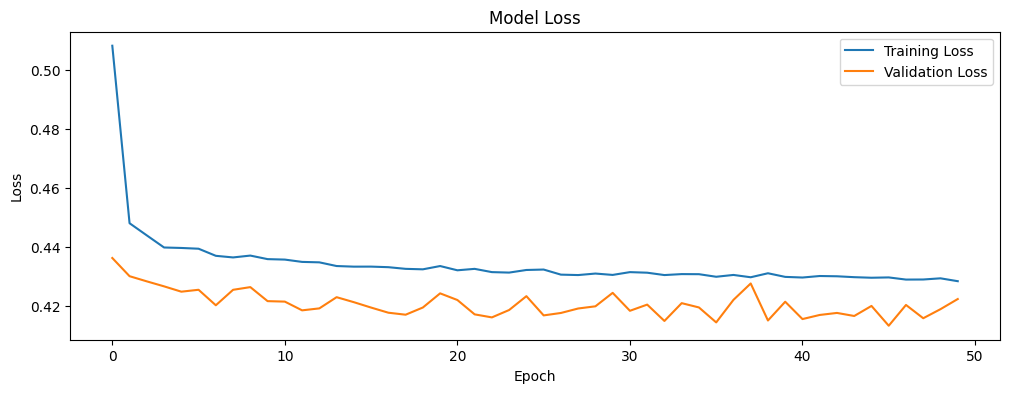

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

In [ ]:
best_model.save("best_churn_model.h5")

In [ ]:
# WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or
# `keras.saving.save_model(model)`. This file format is considered legacy.
# We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or
# `keras.saving.save_model(model, 'my_model.keras')`. nwer

In [ ]:
#seldcted features?
with open('selected_features.pkl','wb') as f:
  pickle.dump(selected_features, f)

In [ ]:
#predictions?  write read -save w, read - r
def load_model_components():
  model = tf.keras.models.load_model("best_churn_model.h5")
  with open('scaler.pkl','rb') as f:
    scaler = pickle.load(f)
  with open('selected_features.pkl','rb') as f:
    selected_features = pickle.load(f)
  return model, scaler, selected_features

def predict_churn(*args):
  model, scaler, selected_features = load_model_components()
  input_data = pd.DataFrame([args], columns=selected_features)
  input_scaled = scaler.transform(input_data)
  prediction = model.predict(input_scaled)[0][0]
  # print(f"prediction : {prediction}")
  probability = float(prediction)
  churn_status = "Yes" if probability > 0.5 else "No"

  return {
      "Churn Probability" : probability,
      "Will Churn?":churn_status
  }

In [ ]:
predict_churn(1,	0	,0	,29.85,	29.85)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
prediction : 0.5638992786407471


In [ ]:
df[selected_features].head(2)

,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,29.85,29.85
1,34,1,1,56.95,1889.50


In [ ]:
df[selected_features].tail(2)

,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges
7041,4,0,1,74.40,306.6
7042,66,2,2,105.65,6844.5


In [ ]:
y.tail(2)

,Churn
7041,1
7042,0


In [ ]:
predict_churn(4	,0	,1	,74.40	,306.6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


{'Churn Probability': 0.5498107075691223, 'Will Churn?': 'Yes'}

In [ ]:
df[selected_features][56:59]

,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges
56,63,1,3,99.65,6311.20
57,66,1,0,108.45,7076.35
58,34,2,3,24.95,894.30


In [ ]:
y[56:59]

,Churn
56,0
57,0
58,0


In [ ]:
predict_churn(63,	1	,3,	99.65,	6311.20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


{'Churn Probability': 0.21396420896053314, 'Will Churn?': 'No'}

In [ ]:
predict_churn(23,	1	,3,	4,	4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


{'Churn Probability': 0.020119355991482735, 'Will Churn?': 'No'}

In [ ]:
#edge detection kernels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def simple_edge_detection(image_path):
  img = Image.open(image_path).convert('L')
  img_array = np.array(img)

  #horizontal edge
  kernel_x = np.array([[-1, 0 , 1],
                       [-2, 0 , 2],
                       [-1, 0 , 1]])
  #verticle edge
  kernel_y = np.array([[-1, -2 , -1],
                       [0, 0 , 0],
                       [1, 2 , 1]])

  edges_x = np.abs(np.convolve(img_array.flatten(), kernel_x.flatten(), mode='same').reshape(img_array.shape))
  edges_y = np.abs(np.convolve(img_array.flatten(), kernel_y.flatten(), mode='same').reshape(img_array.shape))

  edges = np.sqrt(edges_x**2 + edges_y**2)

  edges = (edges - edges.min()) / (edges.max() - edges.min()) * 255

  plt.figure(figsize=(12,4))
  plt.subplot(131), plt.imshow(img_array, cmap='gray')
  plt.title('Original Image'), plt.axis('off')

  plt.subplot(132), plt.imshow(edges, cmap='gray')
  plt.title('Original Image'), plt.axis('off')
  plt.tight_layout()


In [ ]:
from google.colab import files
files.upload()

Saving d3c8388d-799a-4843-a6f8-b7d18519c713.JPG to d3c8388d-799a-4843-a6f8-b7d18519c713.JPG


{'d3c8388d-799a-4843-a6f8-b7d18519c713.JPG': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x05\xdc\x07\xd0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x001\x00\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x06\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02v]\xf7\xf8\xdfV\xd3IY\xb6h\xbd;\x9dB\xca\xd0\xa9d9s\xaa;\xcc\xb1\xf3yCp\xd0\x0c\x00\r\x004\xc1\xc1\x07@\x00\x00@\x00\x003E\xc3C\r\x0c4\xac40\xd0\xc3C4\x00\x00\x00\x03S\r\x00\x

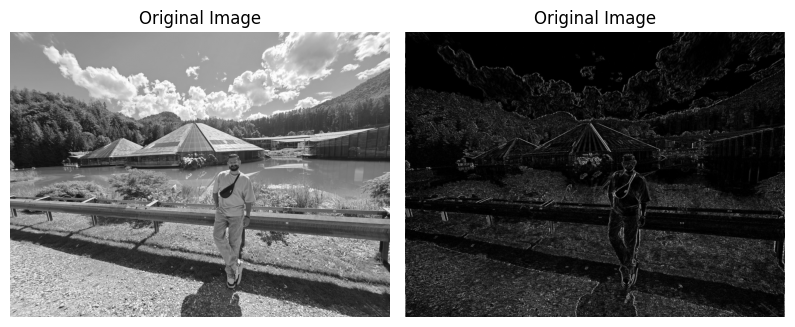

In [ ]:
image_path = "/content/d3c8388d-799a-4843-a6f8-b7d18519c713.JPG"
simple_edge_detection(image_path)

In [ ]:
#Convolution Opeation with CNN's
#yolo - > you only look once

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [ ]:
#load mnist

In [ ]:
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images[45]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        185, 255, 253, 253, 230, 132, 132,  31,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  71, 242,
        252, 252, 228, 231, 252, 252, 252, 167,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 166, 252, 252,
        235,  92,   0,  14, 142, 252, 252, 150,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 204, 252, 234, 152,
         44,   0,   0,  48, 225, 252, 180,  16,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 164, 252, 232,  61,   0,
          0,   0,   6, 179, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 252, 252,  76,   0,   0,
          0,  44, 199, 252, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  89, 252, 228,  32,   0,   0,
         99, 231, 244, 220, 252, 203,  12,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 169, 252, 207,  97,  97, 206,
        234, 243,  32, 157, 252, 145,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  60, 252, 252, 252, 252, 252,
        200,  22,  11, 198, 231,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  26, 131, 224, 252, 252, 142,
         11,   0,  82, 252, 204,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  13, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  82, 252, 220,  36,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 208, 252,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 253, 247,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        121, 253, 199,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,
        216, 244,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        252, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
train_labels[45]

np.uint8(9)

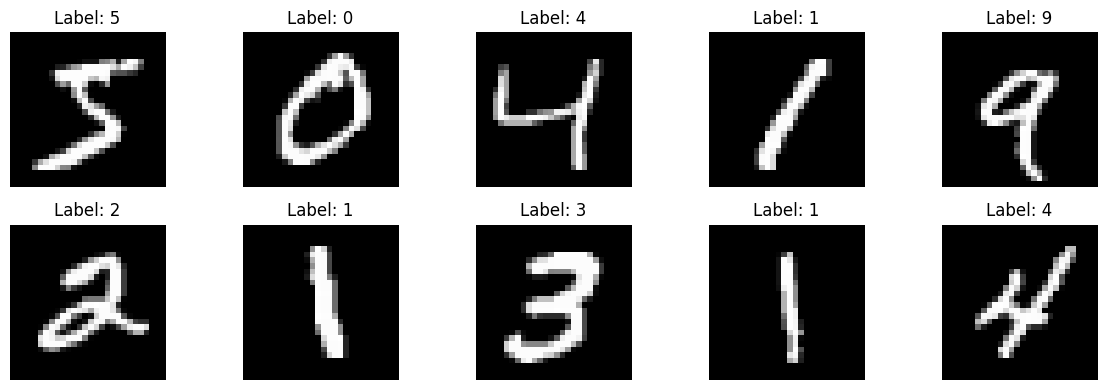

In [ ]:
plt.figure(figsize=(12,4))
for i in range(10):
  plt.subplot(2,5, i+1)
  img = train_images[i].reshape(28,28)
  plt.imshow(img, cmap='gray')
  plt.title(f"Label: {train_labels[i]}")
  plt.axis('off')
plt.tight_layout()

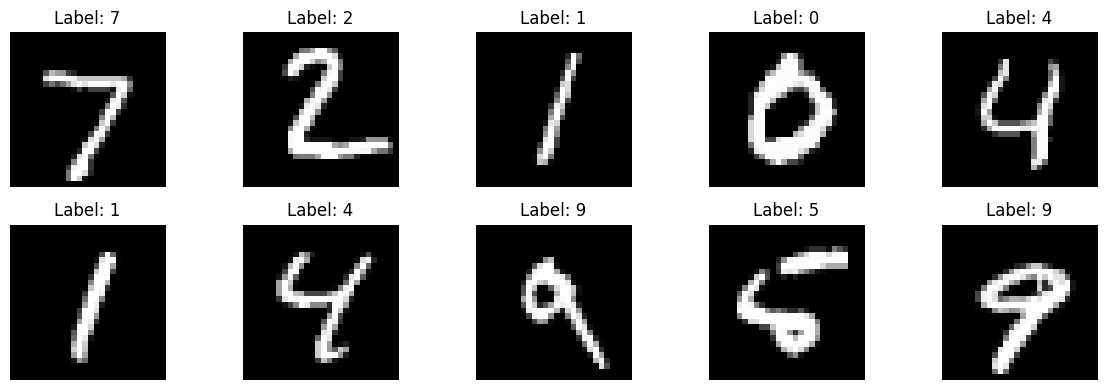

In [ ]:
plt.figure(figsize=(12,4))
for i in range(10):
  plt.subplot(2,5, i+1)
  img = test_images[i].reshape(28,28)
  plt.imshow(img, cmap='gray')
  plt.title(f"Label: {test_labels[i]}")
  plt.axis('off')
plt.tight_layout()

In [ ]:
train_images[45]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        185, 255, 253, 253, 230, 132, 132,  31,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  71, 242,
        252, 252, 228, 231, 252, 252, 252, 167,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 166, 252, 252,
        235,  92,   0,  14, 142, 252, 252, 150,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 204, 252, 234, 152,
         44,   0,   0,  48, 225, 252, 180,  16,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 164, 252, 232,  61,   0,
          0,   0,   6, 179, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 252, 252,  76,   0,   0,
          0,  44, 199, 252, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  89, 252, 228,  32,   0,   0,
         99, 231, 244, 220, 252, 203,  12,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 169, 252, 207,  97,  97, 206,
        234, 243,  32, 157, 252, 145,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  60, 252, 252, 252, 252, 252,
        200,  22,  11, 198, 231,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  26, 131, 224, 252, 252, 142,
         11,   0,  82, 252, 204,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  13, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  82, 252, 220,  36,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 208, 252,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 253, 247,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        121, 253, 199,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,
        216, 244,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        252, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
train_images[45]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
train_images = train_images.reshape((-1, 28, 28,1))
test_images = test_images.reshape((-1, 28, 28, 1))

In [ ]:
#one hot encoding on labels 0,1,2,--9
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

#cat ,  0.  001
# dog,  1.  010
# bird. 2   100

In [ ]:
#data augumentation
data_augumentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [ ]:
#define Cnn
def create_model():
  model = models.Sequential([
      #layer-1
      data_augumentation, #ignore this if u want
      #layer-2
      layers.Conv2D(32, (3,3), activation='relu',
                    input_shape=(28,28,1)),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),
      #layer-3
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),
      #layer-4
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.BatchNormalization(),

      layers.Flatten(),

      #ANN
      layers.Dense(128,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
  ])
  return model

In [ ]:
model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#early stopping?
early_stopping = callbacks.EarlyStopping(patience=5,
                                         restore_best_weights=True)

reduce_lr = callbacks.ReduceLROnPlateau(factor=0.20, patience=3)

In [ ]:
#applied callbacks, 30, 150,140
history = model.fit(train_images,train_labels,
                    epochs=30,
                    validation_split=0.10)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8490 - loss: 0.4802 - val_accuracy: 0.9773 - val_loss: 0.0828
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9633 - loss: 0.1208 - val_accuracy: 0.9790 - val_loss: 0.0780
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9708 - loss: 0.0965 - val_accuracy: 0.9713 - val_loss: 0.1241
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9733 - loss: 0.0888 - val_accuracy: 0.9872 - val_loss: 0.0432
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9791 - loss: 0.0732 - val_accuracy: 0.9898 - val_loss: 0.0422
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9791 - loss: 0.0706 - val_accuracy: 0.9893 - val_loss: 0.0422
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9811 - loss: 0.0658 - val_accuracy: 0.9902 - val_loss: 0.0423
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9821 - 

Text(0, 0.5, 'Accuracy')

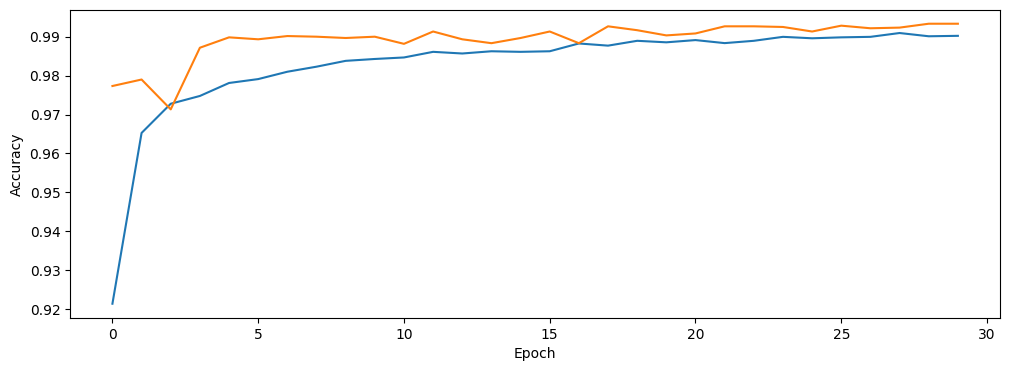

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

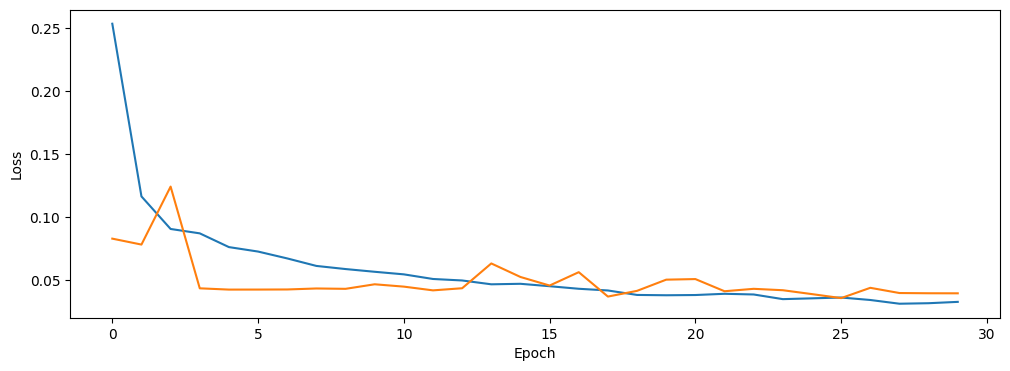

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [ ]:
model.save('mnist_cnn_model.keras')

In [ ]:
def predict_image(image_path, model):
  img = Image.open(image_path).convert('L') #convert black and white
  img = ImageOps.invert(img)
  img = img.resize((28,28))
  img_array = np.array(img)
  img_array = img_array.astype('float32')/255
  img_array = img_array.reshape((1,28,28,1)) #opencv - once, numpy no diff

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)
  confidence = np.max(prediction)
  return predicted_class, confidence

  #try try until u exhausted

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
def load_and_predict(image_path):
  loaded_model = tf.keras.models.load_model('mnist_cnn_model.keras')
  predicted_class, confidence = predict_image(image_path, loaded_model)
  print(f"Predicted digit : {predicted_class}\n")
  print(f"Confidence : {confidence}\n")

  img = Image.open(image_path).convert('L')
  plt.imshow(img, cmap='gray')
  plt.title(f"Predicted: {predicted_class} (confidence : {confidence:.2f})")
  plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
Predicted digit : 8

Confidence : 0.44315677881240845



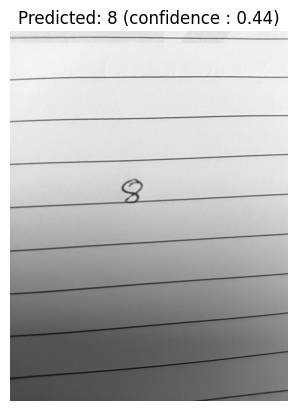

In [ ]:
image_path = "/content/IMG20240820192035.jpg"
load_and_predict(image_path)

In [ ]:
#try this out
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00


In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


image 1/1 /content/360_F_616920258_oNCAxgERc5LcRQdiJ6aYkCWvJwsSGdeR.jpg: 448x640 5 cups, 2 bowls, 1 chair, 1 laptop, 1 keyboard, 1 book, 85.5ms
Speed: 6.0ms preprocess, 85.5ms inference, 10.6ms postprocess per image at shape (1, 3, 448, 640)
Object : laptop
Confidence : 0.9284976124763489
Object : cup
Confidence : 0.8872207999229431
Object : cup
Confidence : 0.8642047047615051
Object : bowl
Confidence : 0.7753785252571106
Object : cup
Confidence : 0.7657117247581482
Object : cup
Confidence : 0.6890273690223694
Object : cup
Confidence : 0.6330698132514954
Object : chair
Confidence : 0.6029002666473389
Object : book
Confidence : 0.4807576835155487
Object : keyboard
Confidence : 0.3402774930000305
Object : bowl
Confidence : 0.3350626528263092


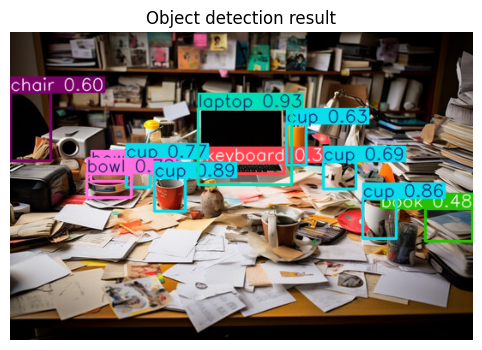

In [ ]:
def load_model():
  model = YOLO('yolov8x.pt')
  return model

def detect_objects(model, image_path):
  results = model(image_path)
  return results

def visualize_results(results):
  for result in results:
    image_with_boxes = result.plot()

    image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,4))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Object detection result")

def print_results(results):
  for result in results:
    boxes = result.boxes
    for box in boxes:
      x1, y1, x2, y2 = box.xyxy[0].tolist()
      confidence = box.conf[0].item()
      class_id = int(box.cls[0].item())
      print(f"Object : {result.names[class_id]}")
      print(f"Confidence : {confidence}")

if __name__ == "__main__":
  model = load_model()
  # image_url = "https://ultralytics.com/images/bus.jpg"
  image_url = "https://t3.ftcdn.net/jpg/06/16/92/02/360_F_616920258_oNCAxgERc5LcRQdiJ6aYkCWvJwsSGdeR.jpg"
  results = detect_objects(model, image_url)
  print_results(results)
  visualize_results(results)

In [ ]:
#time for somthing new
 #ANN - CNN

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm') #model word - 96
word = nlp("love")
word[0].vector[:20] #valid model more dim, beter under 96>

array([-1.3799624 , -0.51166975, -0.27630025, -0.25627843, -0.29968977,
        0.11542419,  0.8737752 ,  0.75393796, -0.1894903 , -1.126951  ,
        0.43089324, -0.741095  , -0.21080402,  0.35336828,  0.29525286,
        1.0779135 , -0.755171  ,  0.25281742, -0.1603876 ,  0.29650235],
      dtype=float32)

In [ ]:
# !pip install gensim

In [ ]:
i went to spain a while ago it was a good trip and i also speak spanish

In [ ]:
import numpy as np
# def tanh_Achtivation(x):
#   return np.tanh(x)

# tanh_Achtivation(1.184)


def sigmoid(x):
  return 1 / 1 + np.exp(-x)

sigmoid(5.22)

np.float64(1.005407329126441)

In [ ]:
# i bought this phine last month, the camera quality was amazing.
# the battery life was good, However, it stopped working yesterday

In [ ]:
st = "i love india!"
st.split()

['i', 'love', 'india!']

In [ ]:
#RNN - LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
path

Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.


'/kaggle/input/amazon-fine-food-reviews'

In [ ]:
csv_file = os.path.join(path,"Reviews.csv")
print(f"csv file path : {csv_file}")
df = pd.read_csv(csv_file)
df.head(2)

csv file path : /kaggle/input/amazon-fine-food-reviews/Reviews.csv


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [ ]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
#df -> new (df_clean)
df_clean = df[['Text','Score']]
df_clean.head(5)

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [ ]:
df_clean = df[['Text',"Score"]]
df_clean.head(2)

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1


In [ ]:
score_pct = (df_clean['Score'].value_counts(normalize=True).sort_index()*100)
score_pct.apply(lambda x : f"{x:.2f}%")

,proportion
Score,
1,9.19%
2,5.23%
3,7.50%
4,14.19%
5,63.88%


In [ ]:
for score in [1,2,3,4,5]:
  sample_review = df_clean[df_clean['Score'] == score]['Text'].iloc[0]
  print(f"\n⭐ {score}-STAR REVIEW:")
  print(f"Sample Review : {sample_review}")


⭐ 1-STAR REVIEW:
Sample Review : Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

⭐ 2-STAR REVIEW:
Sample Review : If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.

⭐ 3-STAR REVIEW:
Sample Review : This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.

⭐ 4-STAR REVIEW:
Sample Review : This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful 

In [ ]:
#viz - data distribution - assumption - bias(we - world)
df_clean['text_length'] = df_clean['Text'].str.len()
df_clean['word_count'] = df_clean['Text'].str.split().str.len()

Text(0, 0.5, 'Number of Reviews')

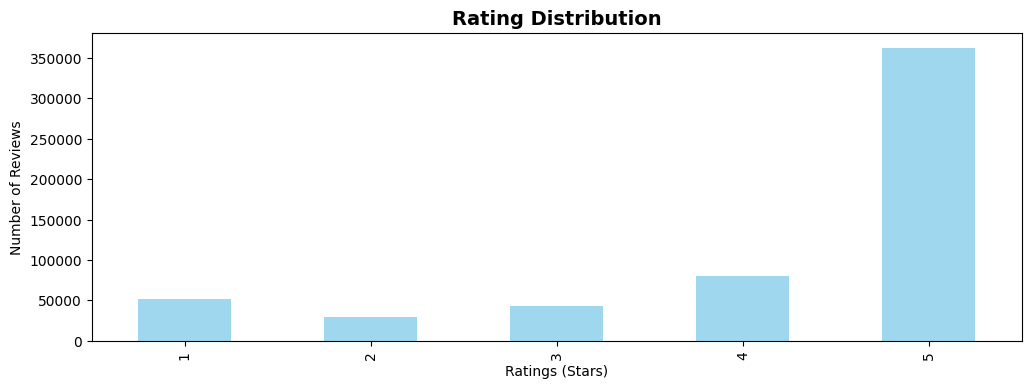

In [ ]:
plt.figure(figsize=(12,4))
score_counts = df_clean['Score'].value_counts().sort_index()
score_counts.plot(kind='bar', color='skyblue',alpha=0.8)
plt.title("Rating Distribution",fontsize=14, fontweight='bold')
plt.xlabel('Ratings (Stars)')
plt.ylabel("Number of Reviews")

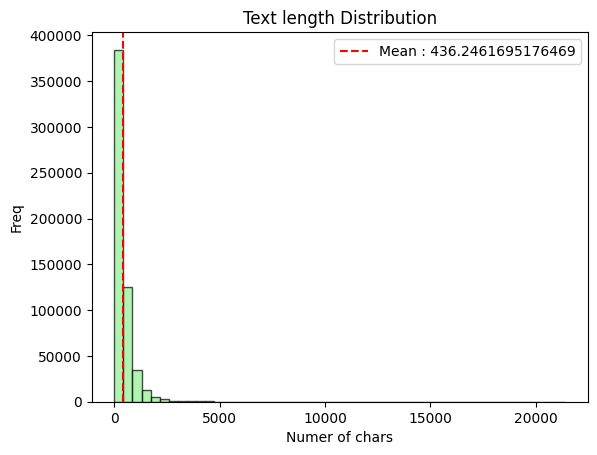

In [ ]:
plt.hist(df_clean['text_length'], bins=50, alpha=0.7, color='lightgreen',edgecolor='black')
plt.title("Text length Distribution")
plt.xlabel("Numer of chars")
plt.ylabel("Freq")
plt.axvline(df_clean['text_length'].mean(), color='red', linestyle='--',
            label=f"Mean : {df_clean['text_length'].mean()}")

plt.legend()

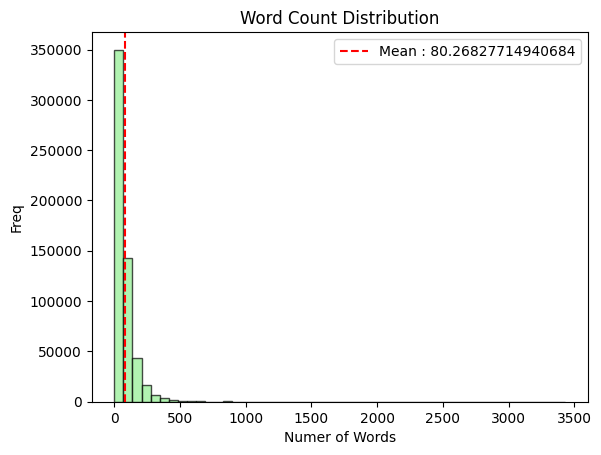

In [ ]:
plt.hist(df_clean['word_count'], bins=50, alpha=0.7, color='lightgreen',edgecolor='black')
plt.title("Word Count Distribution")
plt.xlabel("Numer of Words")
plt.ylabel("Freq")
plt.axvline(df_clean['word_count'].mean(), color='red', linestyle='--',
            label=f"Mean : {df_clean['word_count'].mean()}")

plt.legend()

#chaaty detailed reviews -> oh love it! novel amazing!

In [ ]:
df_clean.head(2)

,Text,Score,text_length,word_count
0,I have bought several of the Vitality canned d...,5,263,48
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31


In [ ]:
#pos, neg  -> binary
# 1,2 -> negative
# 3.  -> ignore
# 4,5 -> positive

In [ ]:
# Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted.
#  Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".  -> 1


#  If you are looking for the secret ingredient in Robitussin I believe I have found it.
#  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.
#  The flavor is very medicinal.    -> 2

In [ ]:
df_binary = df_clean[df_clean['Score'] !=3].copy()
df_binary['sentiment'] = (df_binary['Score']>= 4).astype(int)

In [ ]:
df_binary['Score'].value_counts()

,count
Score,
5,363102
4,80654
1,52264
2,29743


In [ ]:
df[df['Score']==3]['Text'].iloc[5]

"If you're impulsive like me, then $6 is ok. Don't get me wrong, the quality of these babies is very good and I have no complaints. But in retrospect, the price is a little ridiculous (esp. when you add on the shipping)."

In [ ]:
df[df['Score']==1]['Text'].iloc[6]

'No tea flavor at all. Just whole brunch of artifial flavors. It is not returnable. I wasted 20+ bucks.'

In [ ]:
#bi-lstm -> questions, help bi-lstm -> game still on!

In [ ]:
df_binary.head(2)

,Text,Score,text_length,word_count,sentiment
0,I have bought several of the Vitality canned d...,5,263,48,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31,0


In [ ]:
#class dist -> rnn, lstm, sent,
print(f"Negative (1-2) : {sum(df_binary['sentiment']==0):,}")
print(f"Positive (4-5) : {sum(df_binary['sentiment']==1):,}")



#imblance - >

Negative (1-2) : 82,007
Positive (4-5) : 443,756


In [ ]:
#handle imbalance
from sklearn.utils import resample

neg_reviews = df_binary[df_binary['sentiment'] == 0]
pos_reviews = df_binary[df_binary['sentiment'] == 1]

print("=== ORIGINAL IMBLANCE ===")
negative_pct = (sum(df_binary['sentiment']==0) / len(df_binary)) * 100
positive_pct = (sum(df_binary['sentiment']==1) / len(df_binary)) * 100
print(f"negative_pct: {negative_pct:.2f}%")
print(f"positive_pct : {positive_pct:.2f}%")

=== ORIGINAL IMBLANCE ===
negative_pct: 15.60%
positive_pct : 84.40%


In [ ]:
#UNDERSMAPLING
n_minority = len(neg_reviews)
pos_downsampled = resample(pos_reviews,
                           replace=False,
                           n_samples = n_minority,
                           random_state=42)

df_balanced = pd.concat([neg_reviews, pos_downsampled])

#random suffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
print("=== ORIGINAL IMBLANCE ===")
negative_pct = (sum(df_binary['sentiment']==0) / len(df_binary)) * 100
positive_pct = (sum(df_binary['sentiment']==1) / len(df_binary)) * 100
print(f"negative_pct: {negative_pct:.2f}%")
print(f"positive_pct : {positive_pct:.2f}%")


print("=== After  IMBLANCE Handling ===")
print(f"Neg : {sum(df_balanced['sentiment']==0):,} ({sum(df_balanced['sentiment']==0)/len(df_balanced)*100})")
print(f"Pos : {sum(df_balanced['sentiment']==1):,}({sum(df_balanced['sentiment']==1)/len(df_balanced)*100})" )

=== ORIGINAL IMBLANCE ===
negative_pct: 15.60%
positive_pct : 84.40%
=== After  IMBLANCE Handling ===
Neg : 82,007 (50.0)
Pos : 82,007(50.0)


In [ ]:
df_balanced.head(2)

,Text,Score,text_length,word_count,sentiment
0,I found this Harissa Paste somewhat overpoweri...,1,182,34,0
1,I was really disappointed with this instant co...,2,162,26,0


In [ ]:
df_balanced.info() #clear

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164014 entries, 0 to 164013
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Text         164014 non-null  object
 1   Score        164014 non-null  int64 
 2   text_length  164014 non-null  int64 
 3   word_count   164014 non-null  int64 
 4   sentiment    164014 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 6.3+ MB


In [ ]:
#cleaning -> tide, surfecel, nirma -> brand
import re

def clean_text(text):
  #convert to lowercase
  text = text.lower()
  #remove all but keep only (a-zA-Z) _, __, ____
  text = re.sub(r'[^a-zA-Z\s]','', text) #brute force how number 3000, 3.0
  #uneanted extra spaces
  text = ' '.join(text.split())
  return text

# print(f"og : {text_sam}")
# text_sam = df[df['Score']==1]['Text'].iloc[6]
# clean_text(text_sam)

In [ ]:
df_balanced['clean_text'] = df_balanced['Text'].apply(clean_text)

In [ ]:
df_balanced.head(2)

,Text,Score,text_length,word_count,sentiment,clean_text
0,I found this Harissa Paste somewhat overpoweri...,1,182,34,0,i found this harissa paste somewhat overpoweri...
1,I was really disappointed with this instant co...,2,162,26,0,i was really disappointed with this instant co...


In [ ]:
#eda->SO FAR

st = """If you're impulsive like me, then $6 is ok. Don't get me wrong, the quality of these babies is very good and I have no complaints. But in retrospect, the price is a little ridiculous (esp. when you add on the shipping)."""
st[0:200]

"If you're impulsive like me, then $6 is ok. Don't get me wrong, the quality of these babies is very good and I have no complaints. But in retrospect, the price is a little ridiculous (esp. when you ad"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_FEATURES = 10000 # maximum number of words in a vocabulary
MAX_LEN = 100 # Maximum sequence length for the model, words

X = df_balanced['clean_text'].values
y = df_balanced['sentiment'].values

tokenizer = Tokenizer(num_words = MAX_FEATURES, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen = MAX_LEN, padding='post', truncating='post')

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import  Embedding, SimpleRNN, LSTM, Dense, Dropout, Bidirectional

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_padded,y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y) #ratio

In [ ]:
#Namaste Folks, Let's start in 2-4 minutes

In [ ]:
#random = 128, 64, 0.5, 32, -> fine tune
def create_model():
  model = Sequential([
      Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=MAX_LEN),
      SimpleRNN(units=64, return_sequences=False),
      Dropout(0.5),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid')
  ])
  return model

In [ ]:
rnn_model = create_model()
rnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


In [ ]:
#lr-decay, model checkpoint, early stopping

rnn_history = rnn_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=50,
    validation_split=0.2
)

Epoch 1/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6397 - loss: 0.5356 - val_accuracy: 0.5805 - val_loss: 0.7492
Epoch 2/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6644 - loss: 0.5042 - val_accuracy: 0.5813 - val_loss: 0.7883
Epoch 3/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6791 - loss: 0.4977 - val_accuracy: 0.5807 - val_loss: 0.7963
Epoch 4/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6718 - loss: 0.5013 - val_accuracy: 0.5702 - val_loss: 0.8335
Epoch 5/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6840 - loss: 0.4881 - val_accuracy: 0.5898 - val_loss: 0.8759
Epoch 6/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6930 - loss: 0.4702 - val_accuracy: 0.5917 - val_loss: 0.8538
Epoch 7/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7066 - loss: 0.4598 - val_accuracy: 0.5850 - val_loss: 0.9883
Epoch 8/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7075 - loss: 0.4564 - val_

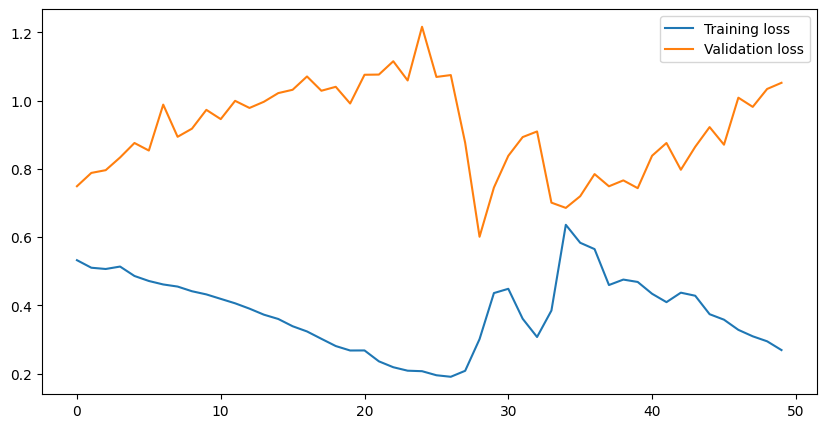

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(rnn_history.history['loss'],label='Training loss')
plt.plot(rnn_history.history['val_loss'],label='Validation loss')
plt.legend()

In [ ]:
#random = 128, 64, 0.5, 32, -> fine tune
def create_model_LSTM():
  model = Sequential([
      Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=MAX_LEN),
      LSTM(units=64, return_sequences=False),
      Dropout(0.5),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid')
  ])
  return model

lstm_model = create_model_LSTM()
lstm_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

lstm_history = lstm_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=50,
    validation_split=0.2
)

Epoch 1/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5460 - loss: 0.6802 - val_accuracy: 0.5811 - val_loss: 0.6545
Epoch 2/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7728 - loss: 0.4672 - val_accuracy: 0.8881 - val_loss: 0.2820
Epoch 3/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9045 - loss: 0.2460 - val_accuracy: 0.8964 - val_loss: 0.2547
Epoch 4/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9301 - loss: 0.1911 - val_accuracy: 0.9104 - val_loss: 0.2261
Epoch 5/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9481 - loss: 0.1462 - val_accuracy: 0.9145 - val_loss: 0.2336
Epoch 6/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9630 - loss: 0.1127 - val_accuracy: 0.9129 - val_loss: 0.2696
Epoch 7/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9724 - loss: 0.0850 - val_accuracy: 0.9152 - val_loss: 0.2634
Epoch 8/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9798 - loss: 0.0680 - val_

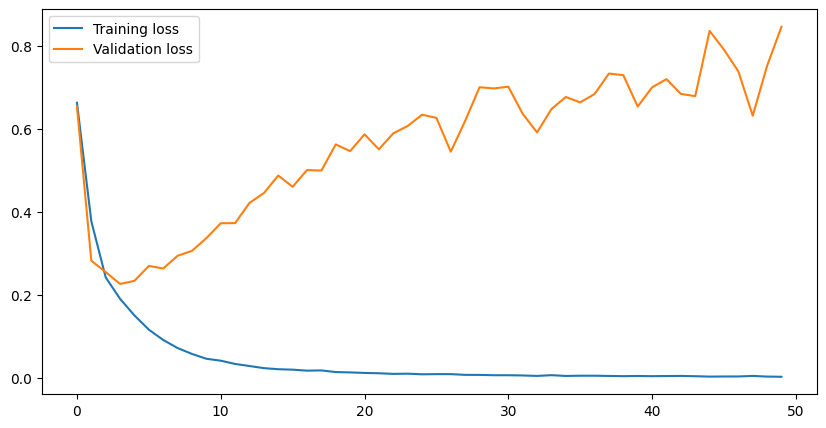

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(lstm_history.history['loss'],label='Training loss')
plt.plot(lstm_history.history['val_loss'],label='Validation loss')
plt.legend()

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_model_with_params(model_type='lstm',embedding_dim=128,units=64,dropout_rate=0.5,learning_rate=0.01):
  model = Sequential([
      Embedding(MAX_FEATURES, embedding_dim, input_length=MAX_LEN)
  ])

  if model_type == 'lstm':
    model.add(LSTM(units,return_sequences=False))
  else:
    model.add(SimpleRNN(units,return_sequences=False))

  model.add(Dropout(dropout_rate))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(
      optimizer= Adam(learning_rate=learning_rate),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
  return model

In [ ]:
param_grid = {
    "model_type":['rnn','lstm'],
    "embedding_dim":[64, 128],
    'units':[32,64,128],
    "dropout_rate":[0.3, 0.5],
    "learning_rate":[0.001, 0.01]
}

In [ ]:
#3 optuna, keras tuner, -> no why?
def random_search(n_trails=8):
  results = []
  np.random.seed(42)

  for i in range(n_trails):
    params = {
        "model_type":str(np.random.choice(param_grid['model_type'])),
        "embedding_dim":int(np.random.choice(param_grid['embedding_dim'])),
        "units":int(np.random.choice(param_grid['units'])),
        "dropout_rate":float(np.random.choice(param_grid['dropout_rate'])),
        "learning_rate":float(np.random.choice(param_grid['learning_rate'])),
    }
    print(f"\n--- Trail {i+1}/{n_trails}-----")
    print(f"PARAMS : {params}")

    try:
      model = create_model_with_params(**params)
      history = model.fit(
          X_train, y_train,
          batch_size=128,
          epochs=5,
          validation_split=0.2
      )
      val_accuracy = max(history.history['val_accuracy'])
      results.append({
          'trail':i+1,
          "params":params,
          "val_accuracy":val_accuracy,
          "model":model
      })
      print(f"Validation Accuract : {val_accuracy:.2f}")
    except Exception as e:
      print(f"Erroe is trial : {str(e)}")

  return results

In [ ]:
random_search(8)


--- Trail 1/8-----
PARAMS : {'model_type': 'rnn', 'embedding_dim': 128, 'units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.001}
Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5365 - loss: 0.6878 - val_accuracy: 0.5394 - val_loss: 0.6882
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5556 - loss: 0.6804 - val_accuracy: 0.5287 - val_loss: 0.6727
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5730 - loss: 0.6504 - val_accuracy: 0.5534 - val_loss: 0.6483
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6054 - loss: 0.6044 - val_accuracy: 0.3748 - val_loss: 0.7727
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6091 - loss: 0.5950 - val_accuracy: 0.7801 - val_loss: 0.6011
Validation Accuract : 0.78

--- Trail 2/8-----
PARAMS : {'model_type': 'lstm', 'embedding_dim': 64, 'units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.01}
Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6938 -

[{'trail': 1,
  'params': {'model_type': 'rnn',
   'embedding_dim': 128,
   'units': 32,
   'dropout_rate': 0.3,
   'learning_rate': 0.001},
  'val_accuracy': 0.7800556421279907,
  'model': <Sequential name=sequential_3, built=True>},
 {'trail': 2,
  'params': {'model_type': 'lstm',
   'embedding_dim': 64,
   'units': 32,
   'dropout_rate': 0.3,
   'learning_rate': 0.01},
  'val_accuracy': 0.9194451570510864,
  'model': <Sequential name=sequential_4, built=True>},
 {'trail': 3,
  'params': {'model_type': 'rnn',
   'embedding_dim': 64,
   'units': 128,
   'dropout_rate': 0.3,
   'learning_rate': 0.01},
  'val_accuracy': 0.5540525317192078,
  'model': <Sequential name=sequential_5, built=True>},
 {'trail': 4,
  'params': {'model_type': 'rnn',
   'embedding_dim': 128,
   'units': 128,
   'dropout_rate': 0.5,
   'learning_rate': 0.001},
  'val_accuracy': 0.6531646251678467,
  'model': <Sequential name=sequential_6, built=True>},
 {'trail': 5,
  'params': {'model_type': 'lstm',
   'embeddin

In [ ]:
 {'trail': 2,
  'params': {'model_type': 'lstm',
   'embedding_dim': 64,
   'units': 32,
   'dropout_rate': 0.3,
   'learning_rate': 0.01},
  'val_accuracy': 0.9194451570510864,
  'model': <Sequential name=sequential_4, built=True>},

In [ ]:
#random = 128, 64, 0.5, 32, -> fine tune
def create_model_LSTM():
  model = Sequential([
      Embedding(input_dim=MAX_FEATURES, output_dim=64, input_length=MAX_LEN),
      LSTM(units=32, return_sequences=False),
      Dropout(0.3),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid')
  ])
  return model

lstm_model = create_model_LSTM()
lstm_model.compile(optimizer=Adam(learning_rate= 0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

lstm_history = lstm_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6526 - loss: 0.5716 - val_accuracy: 0.9007 - val_loss: 0.2524
Epoch 2/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9156 - loss: 0.2252 - val_accuracy: 0.9066 - val_loss: 0.2304
Epoch 3/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9387 - loss: 0.1686 - val_accuracy: 0.9130 - val_loss: 0.2239
Epoch 4/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9494 - loss: 0.1409 - val_accuracy: 0.9168 - val_loss: 0.2218
Epoch 5/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9541 - loss: 0.1280 - val_accuracy: 0.9149 - val_loss: 0.2321
Epoch 6/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9606 - loss: 0.1148 - val_accuracy: 0.9145 - val_loss: 0.2378
Epoch 7/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9613 - loss: 0.1087 - val_accuracy: 0.9129 - val_loss: 0.2542
Epoch 8/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9673 - loss: 0.0961 - val_accuracy

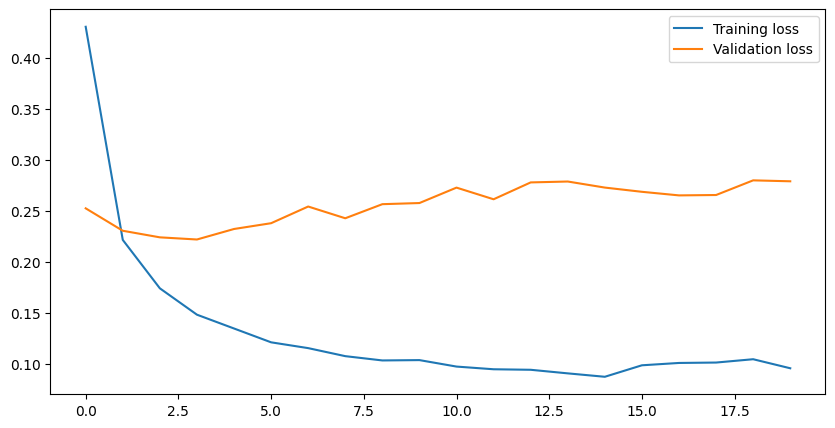

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(lstm_history.history['loss'],label='Training loss')
plt.plot(lstm_history.history['val_loss'],label='Validation loss')
plt.legend()

In [ ]:
#random = 128, 64, 0.5, 32, -> fine tune
def create_model_bilstm():
  model = Sequential([
      Embedding(input_dim=MAX_FEATURES, output_dim=64, input_length=MAX_LEN),
      Bidirectional(LSTM(units=32, return_sequences=True)),
      Dropout(0.3),
      Bidirectional(LSTM(units=32)),
      Dropout(0.3),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid')
  ])
  return model

bilstm_model = create_model_bilstm()
bilstm_model.compile(optimizer=Adam(learning_rate= 0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

bilstm_history = bilstm_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.8039 - loss: 0.4227 - val_accuracy: 0.8994 - val_loss: 0.2380
Epoch 2/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9227 - loss: 0.2022 - val_accuracy: 0.9207 - val_loss: 0.2013
Epoch 3/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9438 - loss: 0.1521 - val_accuracy: 0.9190 - val_loss: 0.2059
Epoch 4/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9520 - loss: 0.1335 - val_accuracy: 0.9226 - val_loss: 0.2060
Epoch 5/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9602 - loss: 0.1133 - val_accuracy: 0.9197 - val_loss: 0.2156
Epoch 6/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9662 - loss: 0.0990 - val_accuracy: 0.9204 - val_loss: 0.2359
Epoch 7/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9669 - loss: 0.0926 - val_accuracy: 0.9198 - val_loss: 0.2384
Epoch 8/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9665 - loss: 0.0957 - 

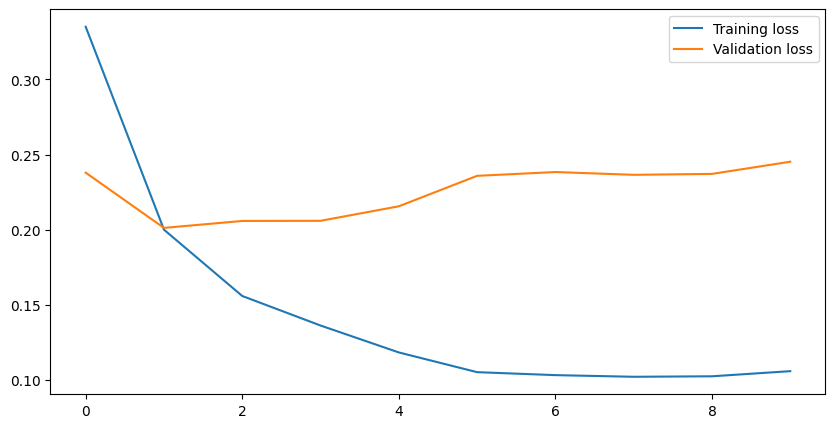

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(bilstm_history.history['loss'],label='Training loss')
plt.plot(bilstm_history.history['val_loss'],label='Validation loss')
plt.legend()

# one sec gus

In [ ]:
#favor, bilstm -> tunung
rnn
lstm
bi lstm -> value best